In [1]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from scipy import stats
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('microbes.csv')
df.head()
df.isnull().sum().sum()
print(df.isnull().sum())
df.describe()

Unnamed: 0         0
Solidity           0
Eccentricity       0
EquivDiameter      0
Extrema            0
FilledArea         0
Extent             0
Orientation        0
EulerNumber        0
BoundingBox1       0
BoundingBox2       0
BoundingBox3       0
BoundingBox4       0
ConvexHull1        0
ConvexHull2        0
ConvexHull3        0
ConvexHull4        0
MajorAxisLength    0
MinorAxisLength    0
Perimeter          0
ConvexArea         0
Centroid1          0
Centroid2          0
Area               0
raddi              0
microorganisms     0
dtype: int64


,Unnamed: 0,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi
count,30527.00000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,...,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.00000,30527.000000
mean,15263.00000,9.677744,19.466921,3.633348,11.871832,0.420022,5.840625,11.751004,22.380901,10.919027,...,11.046482,11.021988,1.605159,1.014179,0.829416,0.254596,11.752783,11.554286,0.80278,5.214598
std,8812.53017,4.063437,3.479828,2.210851,6.045135,0.875091,3.250999,6.575319,0.962906,6.093280,...,6.089508,6.089467,1.662537,1.224326,1.152165,0.971035,6.029756,5.700637,1.17043,2.805199
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,7631.50000,6.570000,17.300000,2.180000,6.790000,0.093700,3.280000,6.005000,22.300000,5.690000,...,5.790000,5.755000,0.635000,0.421000,0.253000,0.034700,6.570000,7.110000,0.21800,3.080000
50%,15263.00000,9.350000,20.700000,3.380000,12.000000,0.229000,5.260000,12.100000,22.600000,10.900000,...,11.000000,11.000000,1.160000,0.745000,0.518000,0.085700,12.100000,11.200000,0.51400,5.320000
75%,22894.50000,12.600000,22.200000,4.580000,17.200000,0.434500,7.850000,17.200000,22.900000,15.800000,...,15.900000,15.900000,2.070000,1.220000,0.968000,0.200000,16.900000,16.200000,0.93400,7.050000
max,30526.00000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.00000,23.000000


In [3]:
df.dtypes

,0
Unnamed: 0,int64
Solidity,float64
Eccentricity,float64
EquivDiameter,float64
Extrema,float64
FilledArea,float64
Extent,float64
Orientation,float64
EulerNumber,float64
BoundingBox1,float64


**Data Visualization**

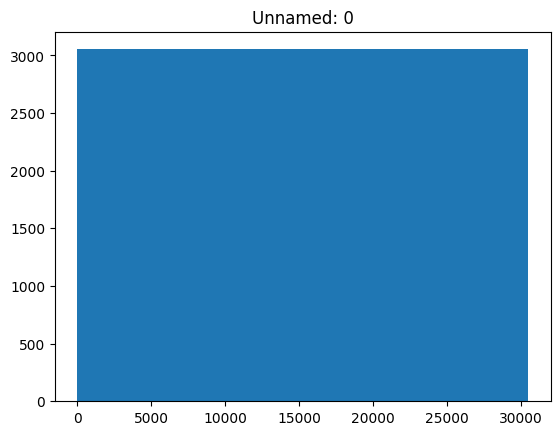

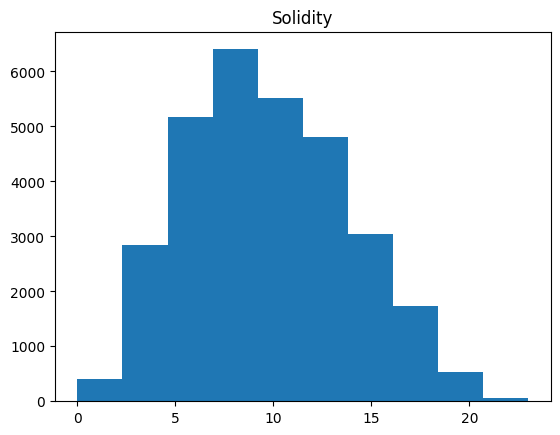

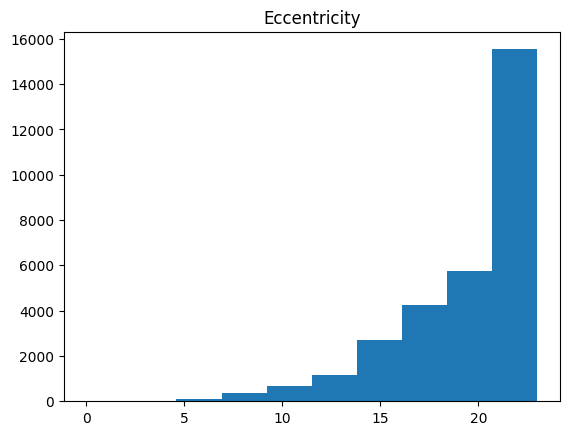

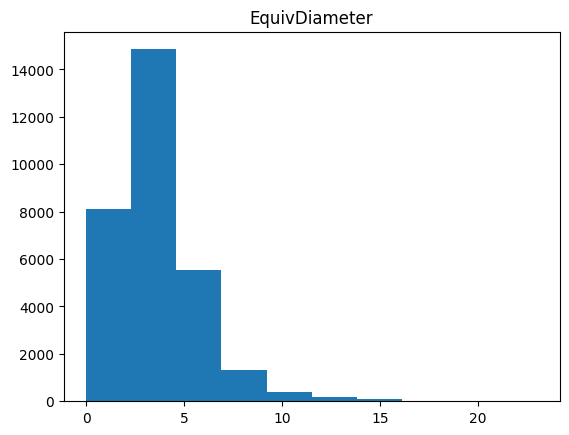

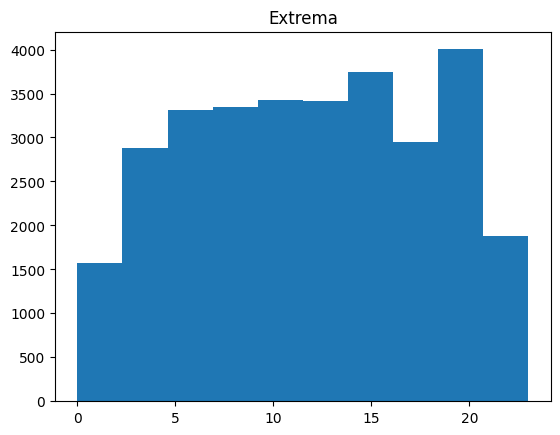

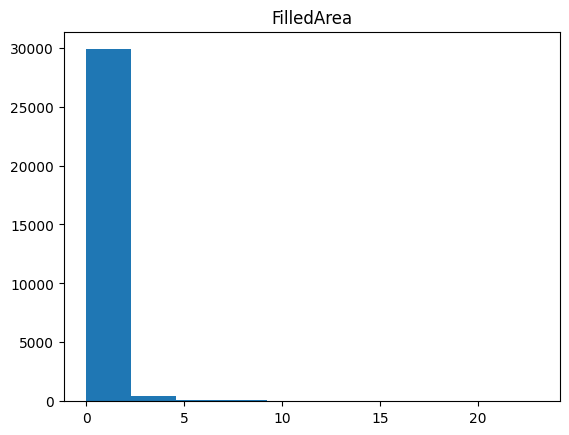

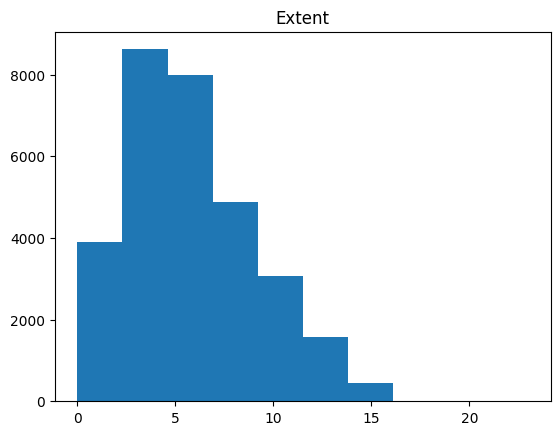

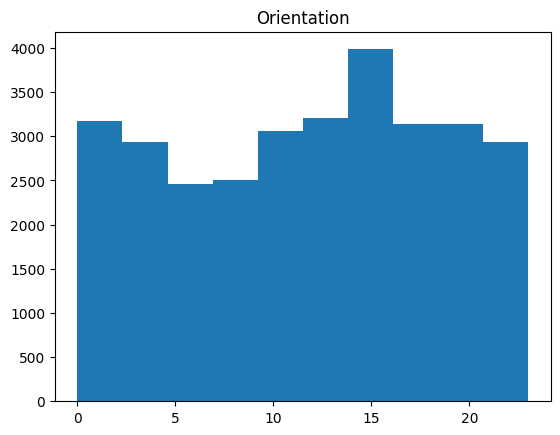

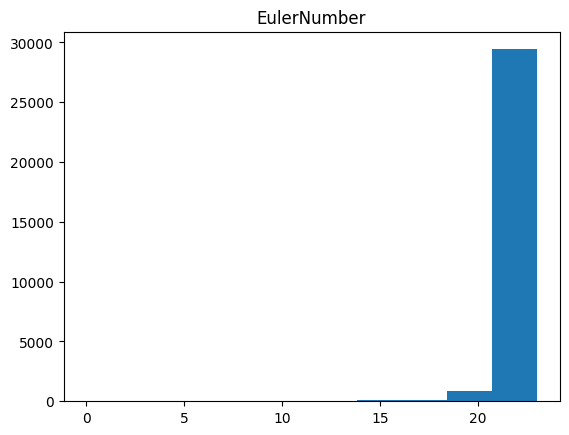

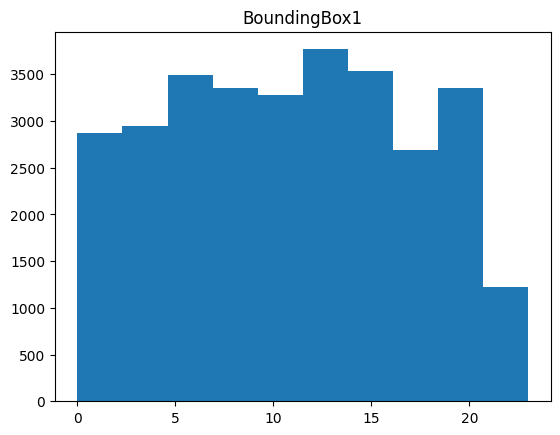

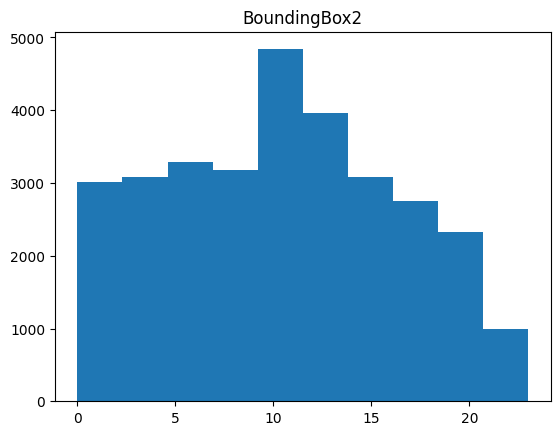

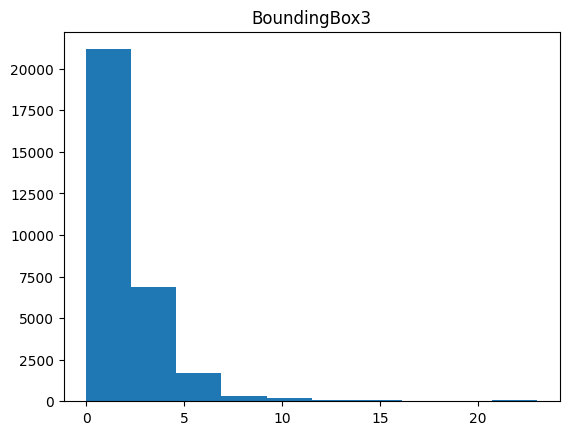

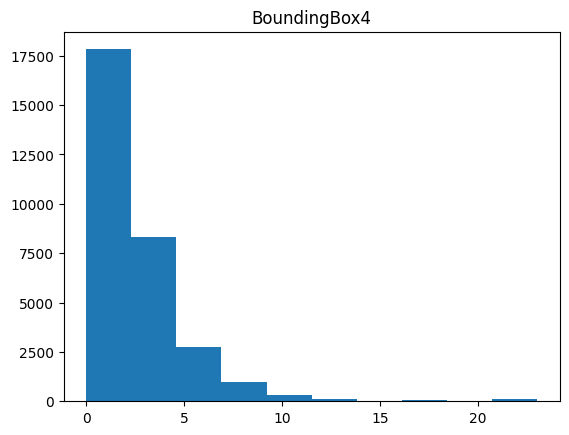

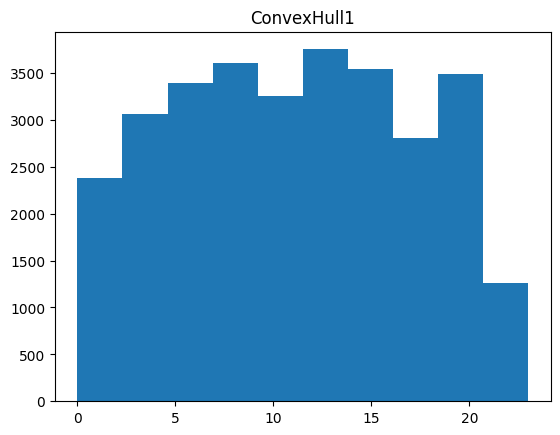

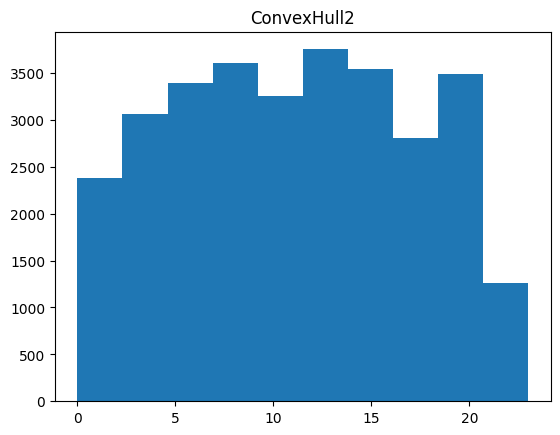

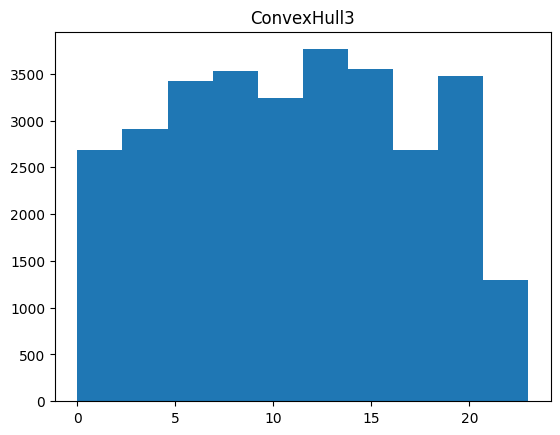

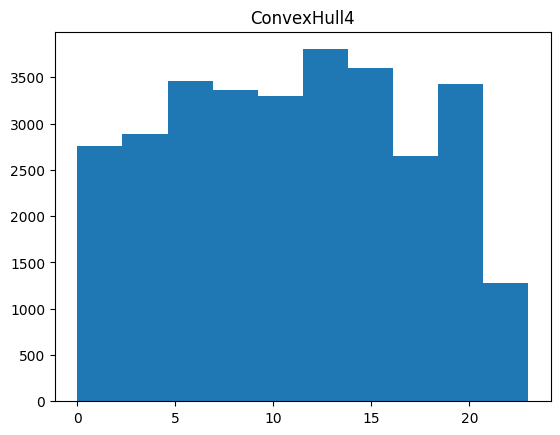

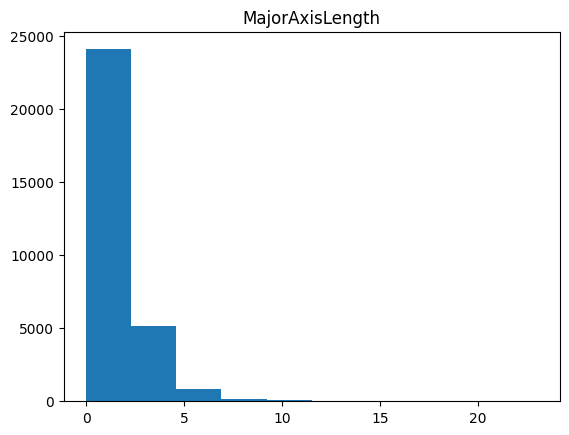

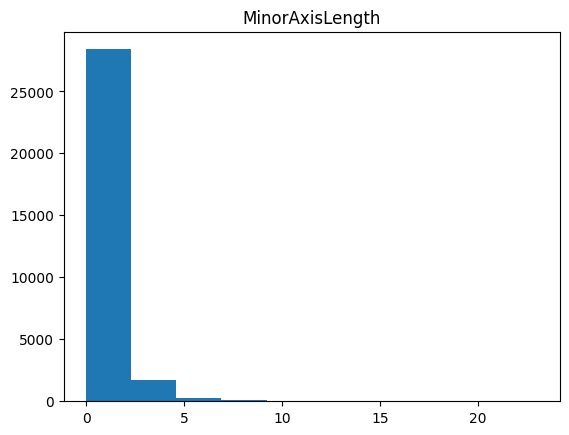

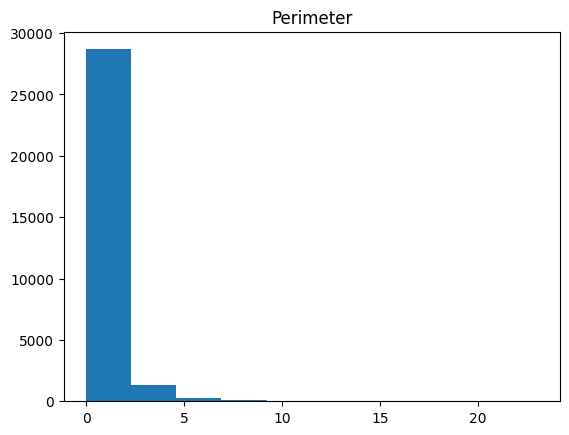

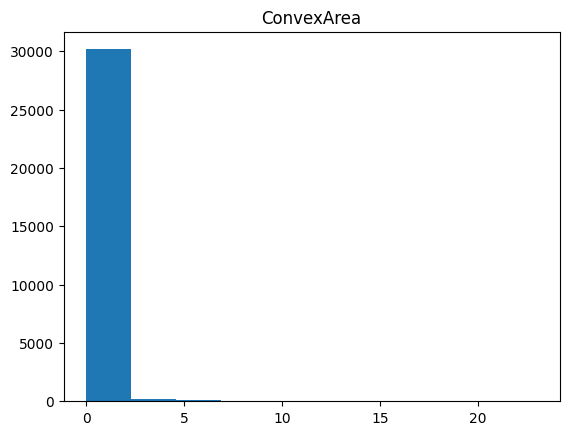

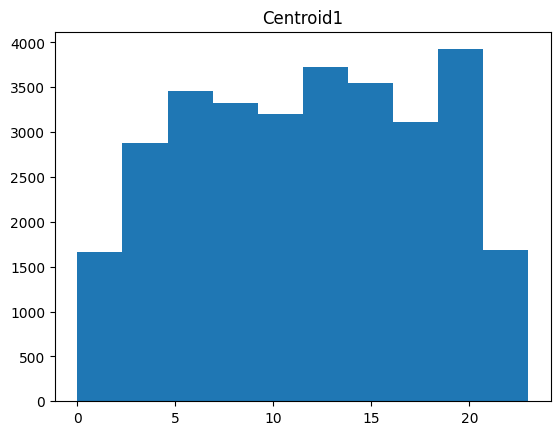

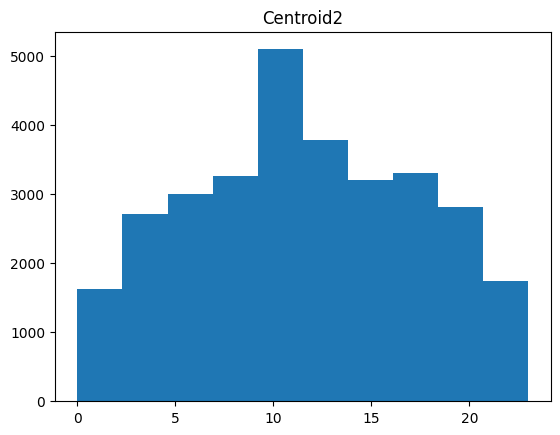

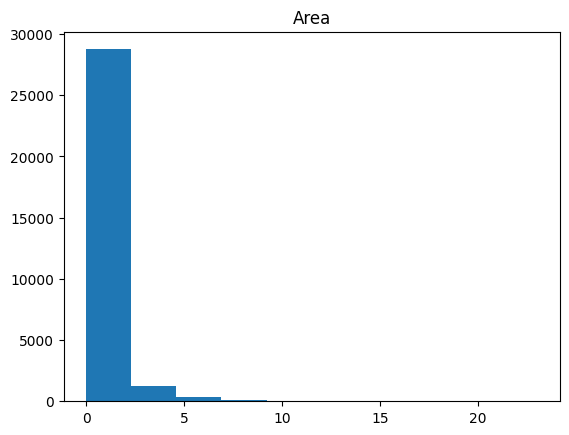

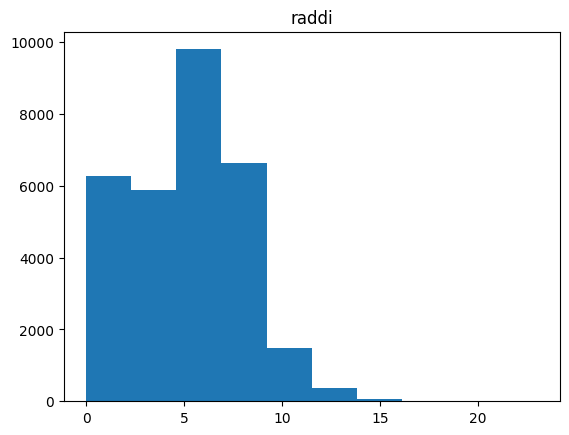

In [4]:
for col in df.columns[:-1]:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [5]:
outliers = pd.DataFrame(columns = df.columns)
for col in df.columns[1:-2]:
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    small = df[col].quantile(0.25) - 1.5*IQR
    large = df[col].quantile(0.75) + 1.5*IQR
    outliers = pd.concat([outliers, df[(df[col] < small) | (df[col] > large)]])
outliers

<ipython-input-5-3cfa195e8b4c>:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outliers = pd.concat([outliers, df[(df[col] < small) | (df[col] > large)]])


,Unnamed: 0,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
23125,23125,23.00,0.00,0.0000,1.68,0.000000,23.00,11.5,23.0,1.700,...,1.710,0.0000,0.0000,0.00000,0.00000,1.45,11.80,0.000000,4.16,Ulothrix
23126,23126,23.00,0.00,0.0000,1.78,0.000000,23.00,11.5,23.0,1.800,...,1.810,0.0000,0.0000,0.00000,0.00000,1.55,14.80,0.000000,4.16,Ulothrix
23127,23127,23.00,0.00,0.0000,4.36,0.000000,23.00,11.5,23.0,4.400,...,4.410,0.0000,0.0000,0.00000,0.00000,4.15,8.96,0.000000,4.16,Ulothrix
23128,23128,23.00,0.00,0.0000,6.10,0.000000,23.00,11.5,23.0,6.150,...,6.170,0.0000,0.0000,0.00000,0.00000,5.91,3.57,0.000000,4.16,Ulothrix
23129,23129,23.00,16.80,0.0665,13.40,0.000219,15.30,23.0,23.0,13.500,...,13.500,0.0155,0.0126,0.00321,0.00004,13.30,17.50,0.000574,4.16,Ulothrix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30505,30505,2.21,8.73,9.1800,15.90,1.460000,1.70,19.5,20.9,13.400,...,13.900,5.1900,7.9700,3.84000,2.56000,16.20,12.60,3.700000,7.15,Ulothrix
30509,30509,2.15,17.70,7.0500,2.59,0.853000,1.78,22.8,22.0,0.145,...,0.697,5.0800,5.3600,2.41000,1.56000,1.92,9.07,2.190000,12.10,Ulothrix
30511,30511,2.10,8.45,7.0700,6.23,0.852000,1.64,22.7,22.0,3.860,...,4.450,4.5300,6.9800,1.99000,1.60000,6.45,13.60,2.200000,12.10,Ulothrix
30512,30512,2.30,4.59,6.9000,7.03,7.570000,1.80,11.7,22.7,4.730,...,5.150,4.1100,6.6900,0.90400,1.40000,7.03,3.62,2.100000,12.10,Ulothrix


In [6]:
#missing values
print('NUMBER OF MISSING VALUES FOR EACH FEATURE:')
mask = df.isnull()
total = mask.sum()
percent = 100*mask.mean()

missing_data = pd.concat([total, percent], axis=1,join='outer',
                         keys=['count_missing', 'perc_missing'])
missing_data.sort_values(by='perc_missing', ascending=False, inplace=True)
missing_data

NUMBER OF MISSING VALUES FOR EACH FEATURE:


,count_missing,perc_missing
Unnamed: 0,0,0.0
Solidity,0,0.0
raddi,0,0.0
Area,0,0.0
Centroid2,0,0.0
Centroid1,0,0.0
ConvexArea,0,0.0
Perimeter,0,0.0
MinorAxisLength,0,0.0
MajorAxisLength,0,0.0


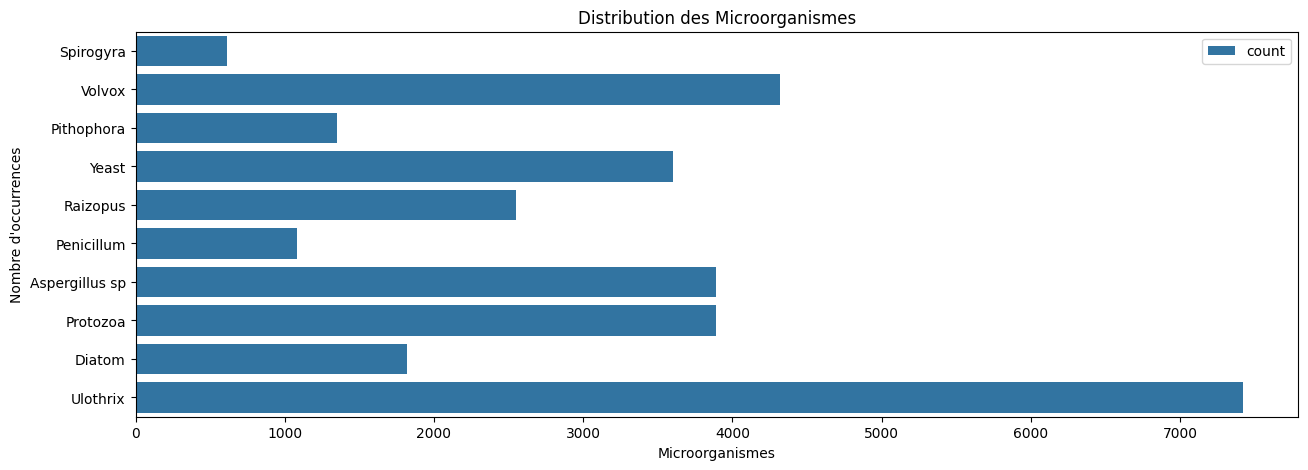

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))
sns.countplot(df['microorganisms'], label="count")
plt.title('Distribution des Microorganismes')
plt.xlabel('Microorganismes')
plt.ylabel('Nombre d\'occurrences')
plt.legend()
plt.show()


**Analyzing the data distribution**

The dataset is imbalanced, which means some labels will hold more weight than others when predicting labels
Two solutions are:
undersample - remove data points from the oversaturated labels
oversample - duplicate existing data points from the smaller distributions
For our purposes, we want to avoid undersampling because that will lead to information loss
instead, we will use a method called SMOTE, which is a variation of oversampling ( More on this later )

<Axes: xlabel='Solidity', ylabel='Eccentricity'>

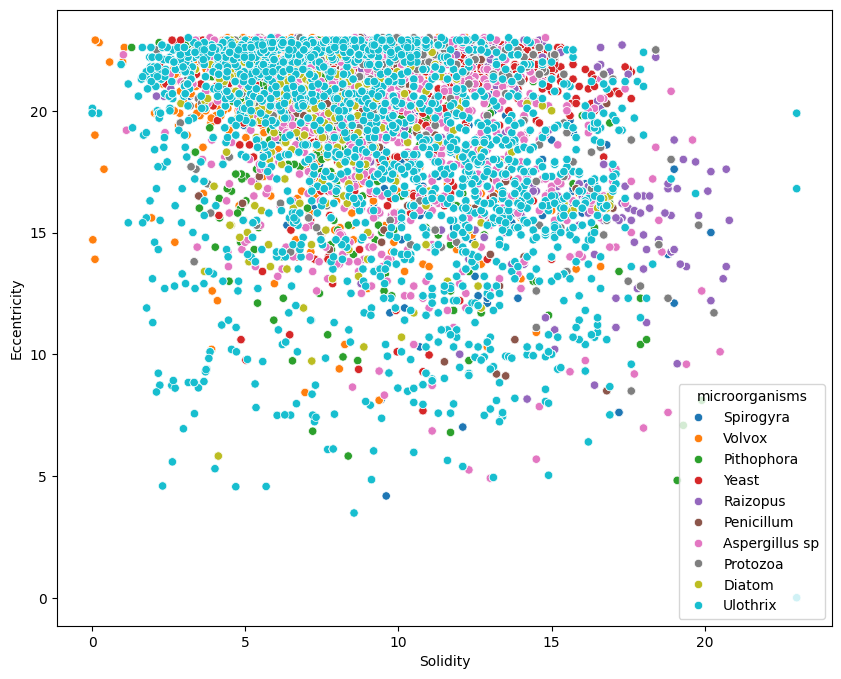

In [8]:
plt.figure(figsize = (10, 8), dpi = 100)
sns.scatterplot(data = df, x = 'Solidity', y = 'Eccentricity', hue = 'microorganisms')


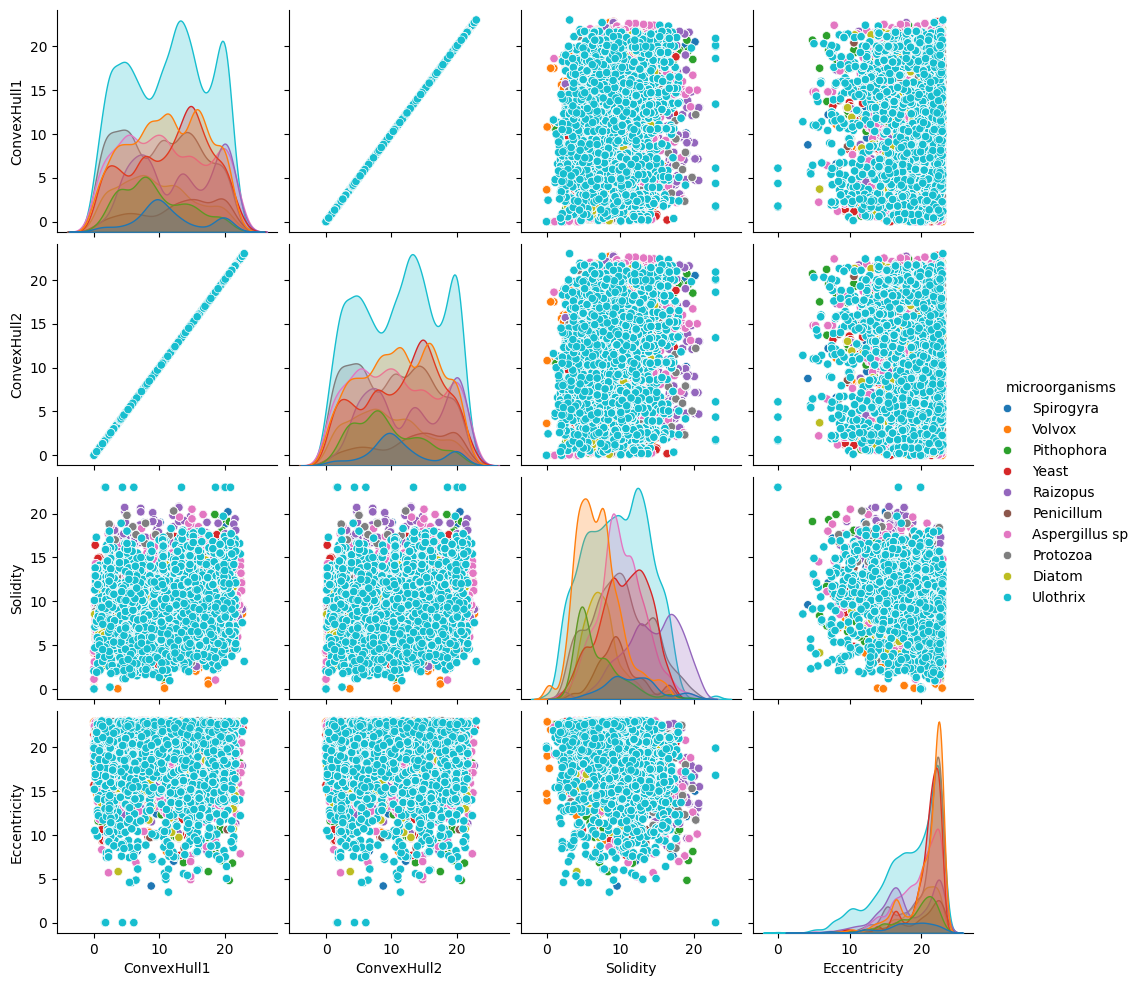

In [9]:
# pairplot
sns.pairplot(df[['ConvexHull1', 'ConvexHull2', 'Solidity', 'Eccentricity', 'microorganisms']], hue='microorganisms')
plt.show()

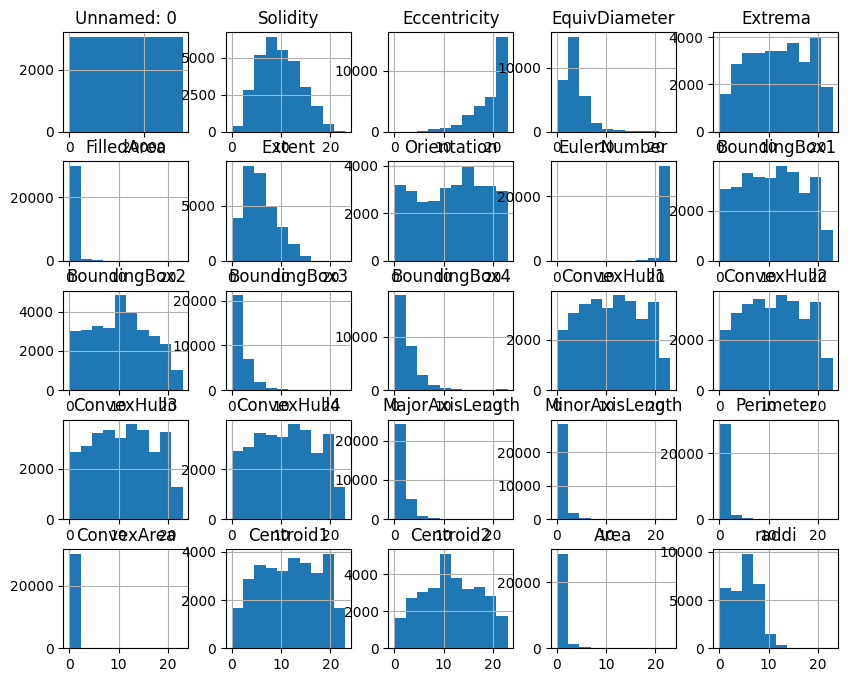

In [10]:
import matplotlib.pyplot as plt

df.hist(figsize=(10, 8))
plt.show()

<Axes: >

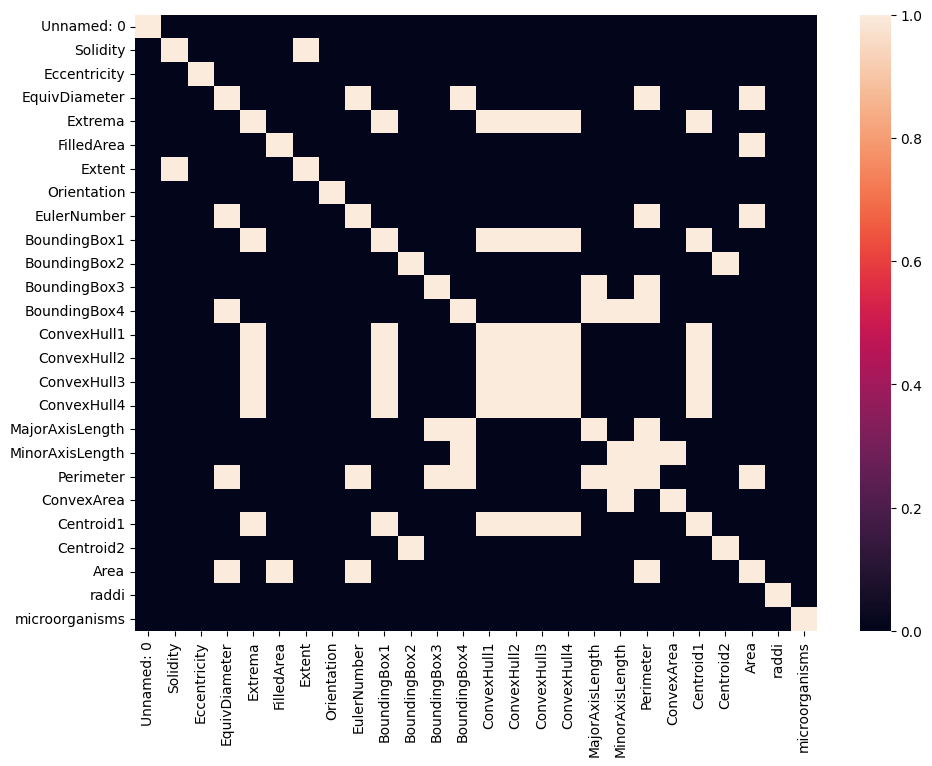

In [11]:
plt.figure(figsize = (11, 8), dpi = 100)
t = df.copy()
t['microorganisms'] = t['microorganisms'].astype('category')
t['microorganisms'] = t['microorganisms'].cat.codes
sns.heatmap(abs(t.corr()) > 0.75)

In [12]:
X = df.drop('microorganisms', axis = 1)
y = df['microorganisms']
poly = PolynomialFeatures(degree = 3)
pca = PCA(n_components = 15)
sc = StandardScaler()
combined_features = Pipeline([('poly', poly), ('sc', sc), ('pca', pca)])

In [13]:
# Créer un pipeline qui impute les valeurs manquantes et applique PolynomialFeatures
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

# Appliquer la transformation
X_features = pipeline.fit_transform(X, y)

# Générer automatiquement les noms de colonnes
poly_feature_names = pipeline.named_steps['poly'].get_feature_names_out(X.columns)

# Créer un nouveau DataFrame avec les caractéristiques transformées
X_new = pd.DataFrame(data=X_features, columns=poly_feature_names)

# Afficher les premières lignes du nouveau DataFrame
print(X_new.head())

   Unnamed: 0  Solidity  Eccentricity  EquivDiameter  Extrema  FilledArea  \
0         0.0     10.70          15.8           5.43     3.75       0.785   
1         1.0      5.60          18.3           4.14     6.16       0.364   
2         2.0      8.32          19.8           4.63     6.66       0.415   
3         3.0     10.10          17.9           7.29    11.10       1.470   
4         4.0      6.27          20.2          20.10    10.70      14.700   

   Extent  Orientation  EulerNumber  BoundingBox1  ...  Centroid1^2  \
0    8.14         2.15         22.3          2.97  ...      13.1769   
1    3.51        18.60         22.5          5.41  ...      36.1201   
2    5.85        21.00         22.4          5.96  ...      42.9025   
3    6.30         9.94         21.9          8.81  ...     106.0900   
4    3.97         2.58         11.9         10.20  ...     196.0000   

   Centroid1 Centroid2  Centroid1 Area  Centroid1 raddi  Centroid2^2  \
0               43.923         4.75530

<Axes: >

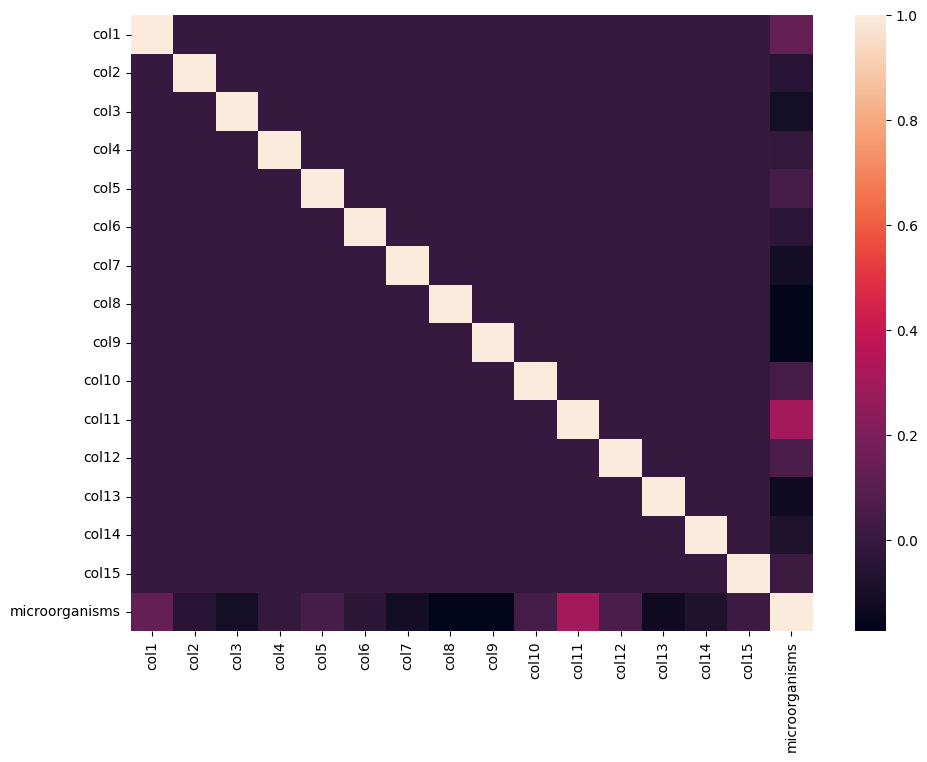

In [14]:
X_features = combined_features.fit(X, y).transform(X)
cols = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10', 'col11', 'col12', 'col13', 'col14', 'col15']
X_new = pd.DataFrame(data = X_features, columns = cols)
X_new.head()

df_new = pd.concat([X_new, y], axis = 1)
df_new['microorganisms'] = df_new['microorganisms'].astype('category')
df_new['microorganisms'] = df_new['microorganisms'].cat.codes
plt.figure(figsize = (11, 8), dpi = 100)
sns.heatmap(df_new.corr())

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_new, y)
X_train.describe()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15
count,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000
mean,-0.012608,-0.065353,-0.099294,0.121092,0.017602,0.060622,-0.007792,-0.034525,-0.023201,-0.060120,0.004968,-0.002744,-0.007268,0.011590,-0.010556
std,31.868843,24.068872,14.356472,13.831340,13.837336,11.353843,9.836410,9.814317,9.129070,7.783890,7.462121,7.023404,6.610605,6.053823,5.393978
min,-31.326527,-85.176422,-47.585227,-188.306891,-141.775156,-130.398157,-113.325545,-91.325675,-80.584490,-200.077039,-85.570027,-99.427950,-77.442834,-60.485206,-62.573283
25%,-18.198711,-16.813123,-6.934032,-5.371271,-6.798988,-5.549148,-5.354488,-5.791413,-4.829544,-2.644518,-3.697134,-2.766959,-2.411237,-2.506082,-1.745011
50%,-7.602267,3.732787,-1.428960,0.463698,1.023173,0.183922,0.013960,1.171845,0.676139,0.171283,0.106592,0.147700,0.199970,0.760392,0.282503
75%,7.265597,18.343328,5.752423,5.937602,7.531116,6.180450,5.845537,5.393496,5.083279,2.088891,3.832617,2.873261,2.611681,3.020181,2.010632
max,496.488524,287.532265,440.402017,426.413401,221.545997,183.666979,143.073242,160.629341,132.447633,200.489815,134.923841,109.211866,101.277706,66.999428,103.269010


**Baseline Models**

**Logistic regression**

In [16]:
lg = LogisticRegression(C = 10, class_weight='balanced', l1_ratio = 0.7, max_iter = 3000, penalty = 'elasticnet', solver = 'saga')
pipe_l = Pipeline([('sc', StandardScaler()), ('lg', lg)])
#param_grid = {'lg__penalty':['elasticnet'], 'lg__C':[0.5, 1, 10], 'lg__class_weight':['balanced'], 'lg__solver':['saga'], 'lg__max_iter':[600], 'lg__l1_ratio':[ 0.1, 0.7]}
#grid = GridSearchCV(pipe, param_grid)
#grid.fit(X_train, y_train)
pipe_l.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('sc', StandardScaler()),
                ('lg',
                 LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.7,
                                    max_iter=3000, penalty='elasticnet',
                                    solver='saga'))])

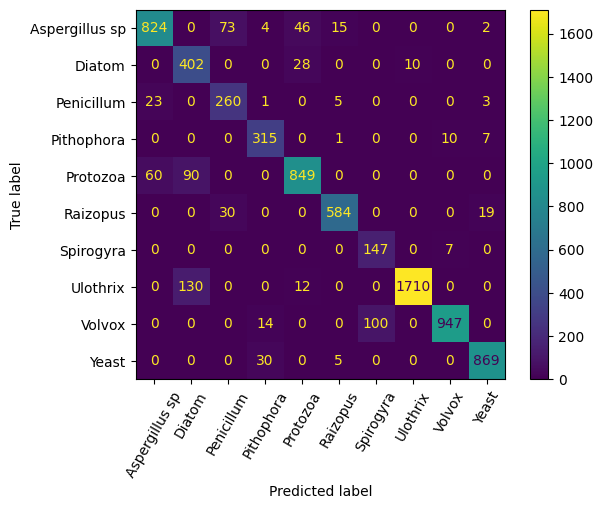

                precision    recall  f1-score   support

Aspergillus sp       0.91      0.85      0.88       964
        Diatom       0.65      0.91      0.76       440
    Penicillum       0.72      0.89      0.79       292
    Pithophora       0.87      0.95      0.90       333
      Protozoa       0.91      0.85      0.88       999
      Raizopus       0.96      0.92      0.94       633
     Spirogyra       0.60      0.95      0.73       154
      Ulothrix       0.99      0.92      0.96      1852
        Volvox       0.98      0.89      0.94      1061
         Yeast       0.97      0.96      0.96       904

      accuracy                           0.91      7632
     macro avg       0.85      0.91      0.87      7632
  weighted avg       0.92      0.91      0.91      7632



In [17]:
# Calculer et afficher la matrice de confusion
ConfusionMatrixDisplay.from_estimator(pipe_l, X_test, y_test, xticks_rotation=60)
plt.show()

# Afficher le rapport de classification
y_pred = pipe_l.predict(X_test)
print(classification_report(y_test, y_pred))


In [18]:
# Show actual vs predictions
print(f"Actual: \n {y_test[:20]}")
print(f"Predictions: \n {y_pred[:20]}")

Actual: 
 1298             Volvox
14933    Aspergillus sp
4789             Volvox
17897          Protozoa
14859    Aspergillus sp
18878          Protozoa
19501          Protozoa
19842          Protozoa
29771          Ulothrix
5053         Pithophora
13137        Penicillum
16346    Aspergillus sp
10571          Raizopus
20619          Protozoa
19824          Protozoa
25601          Ulothrix
3782             Volvox
4585             Volvox
28667          Ulothrix
23501          Ulothrix
Name: microorganisms, dtype: object
Predictions: 
 ['Spirogyra' 'Aspergillus sp' 'Volvox' 'Aspergillus sp' 'Aspergillus sp'
 'Protozoa' 'Protozoa' 'Protozoa' 'Ulothrix' 'Pithophora' 'Penicillum'
 'Aspergillus sp' 'Raizopus' 'Protozoa' 'Protozoa' 'Ulothrix' 'Volvox'
 'Volvox' 'Ulothrix' 'Ulothrix']


**SVM**

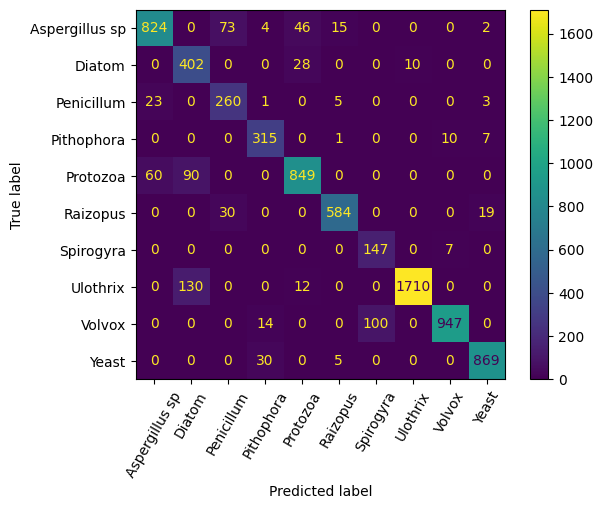

In [19]:

svc = SVC(C = 300, class_weight = 'balanced')
pipe_s = Pipeline([('sc', StandardScaler()), ('svc', svc)])
#param_grid = {'svc__C':[100, 200, 300], 'svc__class_weight':['balanced']}
#grid = GridSearchCV(pipe_s, param_grid)
#grid.fit(X_train, y_train)
pipe_s.fit(X_train, y_train)
# Calculer et afficher la matrice de confusion
ConfusionMatrixDisplay.from_estimator(pipe_l, X_test, y_test, xticks_rotation=60)
plt.show()




In [20]:
y_pred_s = pipe_s.predict(X_test)
print(classification_report(y_test, y_pred_s))

                precision    recall  f1-score   support

Aspergillus sp       1.00      0.99      0.99       964
        Diatom       0.98      1.00      0.99       440
    Penicillum       0.97      1.00      0.99       292
    Pithophora       1.00      0.99      0.99       333
      Protozoa       1.00      1.00      1.00       999
      Raizopus       1.00      1.00      1.00       633
     Spirogyra       0.98      0.93      0.95       154
      Ulothrix       1.00      1.00      1.00      1852
        Volvox       0.99      1.00      0.99      1061
         Yeast       1.00      1.00      1.00       904

      accuracy                           1.00      7632
     macro avg       0.99      0.99      0.99      7632
  weighted avg       1.00      1.00      1.00      7632



In [21]:
# Show actual vs predictions
print(f"Actual: \n {y_test[:20]}")
print(f"Predictions: \n {y_pred_s[:20]}")

Actual: 
 1298             Volvox
14933    Aspergillus sp
4789             Volvox
17897          Protozoa
14859    Aspergillus sp
18878          Protozoa
19501          Protozoa
19842          Protozoa
29771          Ulothrix
5053         Pithophora
13137        Penicillum
16346    Aspergillus sp
10571          Raizopus
20619          Protozoa
19824          Protozoa
25601          Ulothrix
3782             Volvox
4585             Volvox
28667          Ulothrix
23501          Ulothrix
Name: microorganisms, dtype: object
Predictions: 
 ['Volvox' 'Aspergillus sp' 'Volvox' 'Protozoa' 'Aspergillus sp' 'Protozoa'
 'Protozoa' 'Protozoa' 'Ulothrix' 'Pithophora' 'Penicillum'
 'Aspergillus sp' 'Raizopus' 'Protozoa' 'Protozoa' 'Ulothrix' 'Volvox'
 'Volvox' 'Ulothrix' 'Ulothrix']


**Random forest**

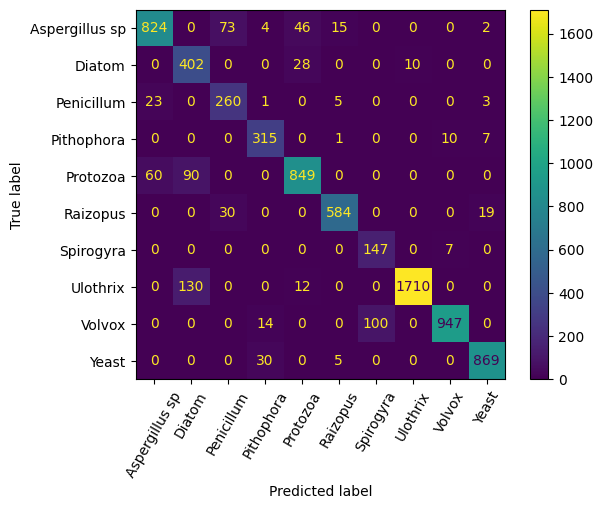

In [22]:
rf = RandomForestClassifier(n_estimators = 300, class_weight = 'balanced', criterion = 'entropy')
#rf = RandomForestClassifier()
#param_grid = {'n_estimators':[300],  'class_weight':['balanced'], 'min_samples_split':[2,3], 'min_samples_leaf':[1,2], 'bootstrap':[True, False]}
#grid = GridSearchCV(rf, param_grid, verbose = 3)
#grid.fit(X_train, y_train)
rf.fit(X_train, y_train)
# Calculer et afficher la matrice de confusion
ConfusionMatrixDisplay.from_estimator(pipe_l, X_test, y_test, xticks_rotation=60)
plt.show()

In [23]:
y_pred_s = pipe_s.predict(X_test)
print(classification_report(y_test, y_pred_s))

                precision    recall  f1-score   support

Aspergillus sp       1.00      0.99      0.99       964
        Diatom       0.98      1.00      0.99       440
    Penicillum       0.97      1.00      0.99       292
    Pithophora       1.00      0.99      0.99       333
      Protozoa       1.00      1.00      1.00       999
      Raizopus       1.00      1.00      1.00       633
     Spirogyra       0.98      0.93      0.95       154
      Ulothrix       1.00      1.00      1.00      1852
        Volvox       0.99      1.00      0.99      1061
         Yeast       1.00      1.00      1.00       904

      accuracy                           1.00      7632
     macro avg       0.99      0.99      0.99      7632
  weighted avg       1.00      1.00      1.00      7632



In [24]:
# Show actual vs predictions
print(f"Actual: \n {y_test[:20]}")
print(f"Predictions: \n {y_pred_s[:20]}")

Actual: 
 1298             Volvox
14933    Aspergillus sp
4789             Volvox
17897          Protozoa
14859    Aspergillus sp
18878          Protozoa
19501          Protozoa
19842          Protozoa
29771          Ulothrix
5053         Pithophora
13137        Penicillum
16346    Aspergillus sp
10571          Raizopus
20619          Protozoa
19824          Protozoa
25601          Ulothrix
3782             Volvox
4585             Volvox
28667          Ulothrix
23501          Ulothrix
Name: microorganisms, dtype: object
Predictions: 
 ['Volvox' 'Aspergillus sp' 'Volvox' 'Protozoa' 'Aspergillus sp' 'Protozoa'
 'Protozoa' 'Protozoa' 'Ulothrix' 'Pithophora' 'Penicillum'
 'Aspergillus sp' 'Raizopus' 'Protozoa' 'Protozoa' 'Ulothrix' 'Volvox'
 'Volvox' 'Ulothrix' 'Ulothrix']


**K-Nearest Neighbors**

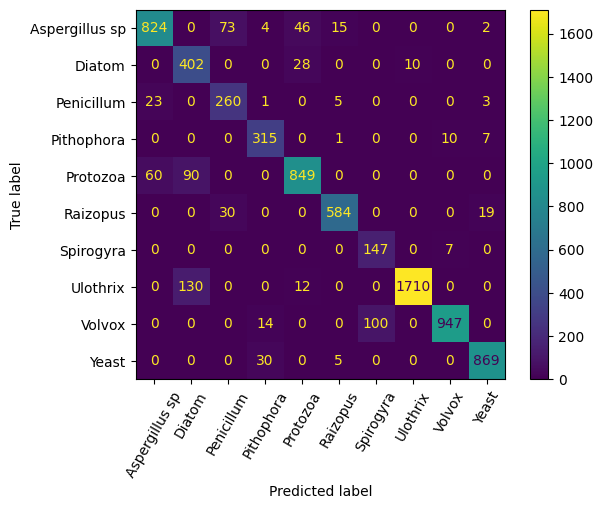

In [25]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(pipe_l, X_test, y_test, xticks_rotation=60)
plt.show()


In [26]:
# Faire des prédictions
y_pred = knn.predict(X_test)
# Évaluer les performances
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Afficher le rapport de classification
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 89.81%
Classification Report:
                precision    recall  f1-score   support

Aspergillus sp       0.85      0.81      0.83       964
        Diatom       0.74      0.77      0.76       440
    Penicillum       0.82      0.70      0.75       292
    Pithophora       0.85      0.69      0.76       333
      Protozoa       0.89      1.00      0.94       999
      Raizopus       0.94      1.00      0.97       633
     Spirogyra       0.95      0.79      0.87       154
      Ulothrix       0.95      0.91      0.93      1852
        Volvox       0.90      0.95      0.92      1061
         Yeast       0.93      0.93      0.93       904

      accuracy                           0.90      7632
     macro avg       0.88      0.86      0.87      7632
  weighted avg       0.90      0.90      0.90      7632



In [27]:
def score_format(score):
    return f"Accuracy: {score:.2%}"

accuracy = knn.score(X_test, y_test)
formatted_score = score_format(accuracy)
print(formatted_score)


Accuracy: 89.81%


The overall score for KNN obtained is 95% with k-value = 3. However, we can determine the optimal value of k by visualizing the k-value VS mean error of the KNN model.

In [28]:
# Show actual vs predictions
print(f"Actual: \n {y_test[:20]}")
print(f"Predictions: \n {y_pred[:20]}")

Actual: 
 1298             Volvox
14933    Aspergillus sp
4789             Volvox
17897          Protozoa
14859    Aspergillus sp
18878          Protozoa
19501          Protozoa
19842          Protozoa
29771          Ulothrix
5053         Pithophora
13137        Penicillum
16346    Aspergillus sp
10571          Raizopus
20619          Protozoa
19824          Protozoa
25601          Ulothrix
3782             Volvox
4585             Volvox
28667          Ulothrix
23501          Ulothrix
Name: microorganisms, dtype: object
Predictions: 
 ['Volvox' 'Aspergillus sp' 'Volvox' 'Protozoa' 'Aspergillus sp' 'Protozoa'
 'Protozoa' 'Protozoa' 'Ulothrix' 'Pithophora' 'Penicillum'
 'Aspergillus sp' 'Raizopus' 'Protozoa' 'Protozoa' 'Ulothrix' 'Volvox'
 'Volvox' 'Ulothrix' 'Ulothrix']


In [29]:
error = []

# Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

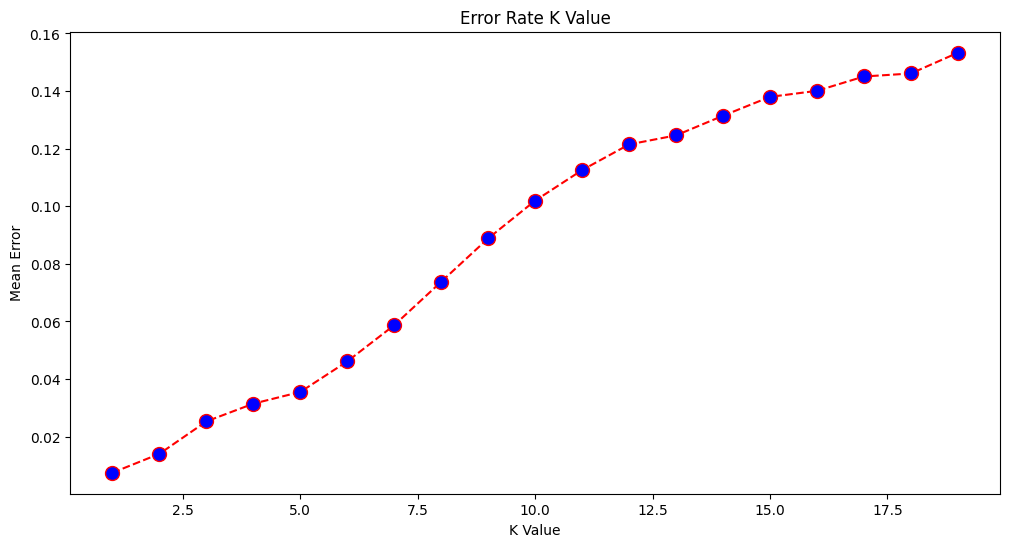

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

From the Error Rate K Value graph above, we can see that the error increases as the k-value increases. It is wise to set lower k-value so that the error is small for KNN algorithm.

Kmeans


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


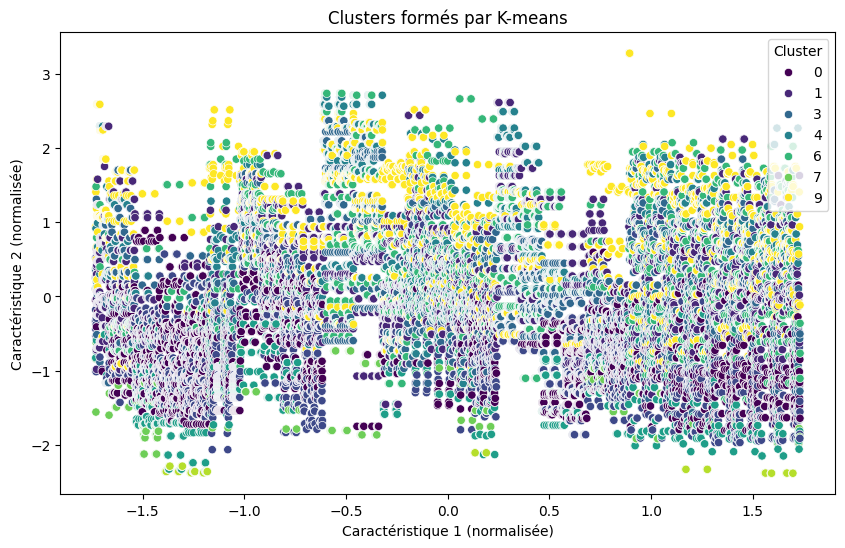

Centres des clusters:
 [[-1.87740438e-01 -7.28204115e-01  3.66992277e-01  4.83580376e-01
   8.30103101e-01  9.00584821e-02 -7.07072413e-01  4.55739721e-02
  -3.40599115e-01  7.41309726e-01 -2.17312238e-01  3.93679630e-01
   4.67080769e-01  7.67378850e-01  7.67378850e-01  7.52900918e-01
   7.51767963e-01  4.28894026e-01  2.10253511e-01  2.74413420e-01
   1.64864135e-02  8.24458217e-01 -1.13691606e-01  2.12396214e-01
   7.59987415e-01]
 [ 5.02976256e-02  2.75647619e-01  1.54882500e-01 -4.54464397e-01
   5.30116631e-02 -2.72903886e-01  1.79322744e-01  1.61547623e-01
   3.66188205e-01  1.24497542e-01 -4.61760184e-01 -4.13438269e-01
  -4.21429287e-01  1.04331054e-01  1.04331054e-01  1.15713843e-01
   1.16862416e-01 -4.10533342e-01 -3.51327405e-01 -3.92022720e-01
  -2.01787032e-01  5.05477760e-02 -5.63698695e-01 -3.62498672e-01
  -3.67122191e-01]
 [-2.40754023e-01 -8.71611311e-01  4.62805282e-01  5.25852746e-01
  -8.47679404e-01  1.01228016e-01 -8.40585336e-01  1.35097738e-01
  -2.11239280e-

In [31]:
# Sélectionner uniquement les colonnes numériques
numeric_cols = df.select_dtypes(include=[np.number]).columns
X = df[numeric_cols]

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Définir le nombre de clusters
kmeans = KMeans(n_clusters=10, random_state=42)

# Ajuster le modèle
kmeans.fit(X_scaled)

# Ajouter les labels des clusters au dataframe original
df['Cluster'] = kmeans.labels_

# Choisir les deux premières caractéristiques pour visualisation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('Clusters formés par K-means')
plt.xlabel('Caractéristique 1 (normalisée)')
plt.ylabel('Caractéristique 2 (normalisée)')
plt.show()

# Afficher les centres des clusters
print('Centres des clusters:\n', kmeans.cluster_centers_)

# Nombre de points dans chaque cluster
print('Points dans chaque cluster:\n', df['Cluster'].value_counts())


Inertie (somme des distances au carré) : 302903.26644102717
Coefficient de silhouette moyen : 0.14122787224497646
Centres des clusters:
 [[-1.87740438e-01 -7.28204115e-01  3.66992277e-01  4.83580376e-01
   8.30103101e-01  9.00584821e-02 -7.07072413e-01  4.55739721e-02
  -3.40599115e-01  7.41309726e-01 -2.17312238e-01  3.93679630e-01
   4.67080769e-01  7.67378850e-01  7.67378850e-01  7.52900918e-01
   7.51767963e-01  4.28894026e-01  2.10253511e-01  2.74413420e-01
   1.64864135e-02  8.24458217e-01 -1.13691606e-01  2.12396214e-01
   7.59987415e-01]
 [ 5.02976256e-02  2.75647619e-01  1.54882500e-01 -4.54464397e-01
   5.30116631e-02 -2.72903886e-01  1.79322744e-01  1.61547623e-01
   3.66188205e-01  1.24497542e-01 -4.61760184e-01 -4.13438269e-01
  -4.21429287e-01  1.04331054e-01  1.04331054e-01  1.15713843e-01
   1.16862416e-01 -4.10533342e-01 -3.51327405e-01 -3.92022720e-01
  -2.01787032e-01  5.05477760e-02 -5.63698695e-01 -3.62498672e-01
  -3.67122191e-01]
 [-2.40754023e-01 -8.71611311e-01

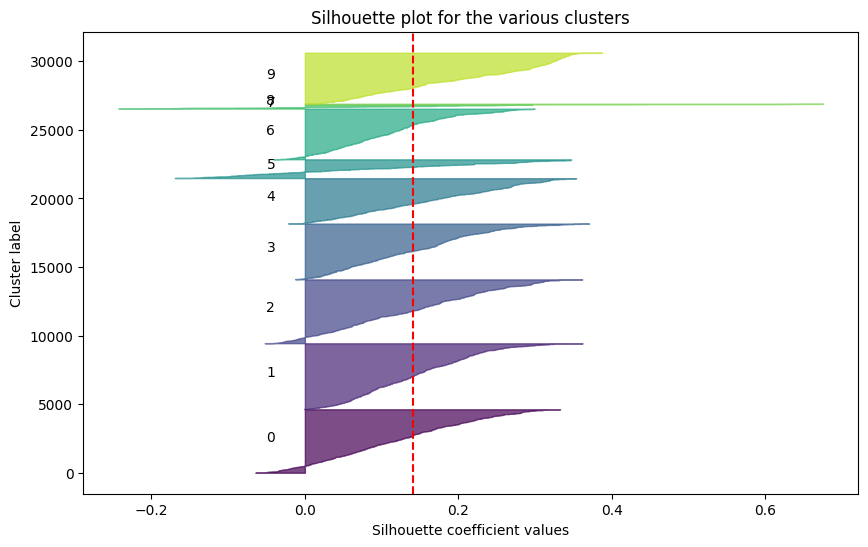

In [32]:
# Inertie
print(f"Inertie (somme des distances au carré) : {kmeans.inertia_}")

# Coefficient de silhouette
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f"Coefficient de silhouette moyen : {silhouette_avg}")



# Afficher les centres des clusters
print('Centres des clusters:\n', kmeans.cluster_centers_)

# Nombre de points dans chaque cluster
print('Points dans chaque cluster:\n', df['Cluster'].value_counts())

# Visualisation du coefficient de silhouette
sample_silhouette_values = silhouette_samples(X_scaled, kmeans.labels_)

fig, ax = plt.subplots(figsize=(10, 6))
y_lower = 10
for i in range(kmeans.n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = sns.color_palette('viridis', as_cmap=True)(i / kmeans.n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_title("Silhouette plot for the various clusters")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.show()


1. Inertie : Plus l'inertie est faible, plus les
clusters sont denses et compacts.

2. Coefficient de silhouette : Mesure la qualité du clustering. Une valeur proche de 1 indique que les points sont bien regroupés, une valeur proche de 0 indique que les points sont à la frontière des clusters, et une valeur négative indique que les points sont probablement mal assignés.

3. Visualisation des clusters : Utilisez un graphique de dispersion pour voir comment les points sont répartis dans les clusters.

4. Visualisation du coefficient de silhouette : Montre la répartition du coefficient de silhouette pour chaque point dans chaque cluster.

**Cross Validation**

**Overfit?**
Since we're using PCA, we'll be duplicating underrepresented data and this may affect our accuracy
Model accuracies suffer from overfitting when models pay too much attention to certain data points during training and cannot predict effectively on unseen points
Cross validation will allow us to determine how well each model generalizes on unseen data
Cross validation will treat the entire dataset as a training AND test set by splitting into K equal parts, and alternating training/test sets among those K-splits

In [33]:
models = [lg,svc,rf,knn]


In [34]:
#for model in models:
    #scores = cross_val_score(estimator=model,X=X,y=y,cv=10,n_jobs=-1)
    #print(f'CV accuracy: {np.mean(scores):.3f} +/- {np.std(scores):.3f}')

**Random Forest** is the best predictor with the highest accuracy and the lowest score std dev, while Gradient Boosting and MLP are the worst... Done, right?
The validation shows that the random forest model generalized very well.
However, the above models are baseline models, so we'll need to optimize them to improve performance.


**Deep Learning**

In [35]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

# Encoder les étiquettes
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convertir les étiquettes en format one-hot
y_train_one_hot = to_categorical(y_train_encoded)
y_test_one_hot = to_categorical(y_test_encoded)

# Définir le modèle
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(len(y.unique()), activation='softmax')  # Nombre de neurones de sortie = nombre de classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Utilisez categorical_crossentropy ici
              metrics=['accuracy'])

# Entraîner le modèle
model.fit(X_train, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.2)

# Évaluer le modèle
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4176 - loss: 1.9245 - val_accuracy: 0.7799 - val_loss: 0.6767
Epoch 2/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8143 - loss: 0.5621 - val_accuracy: 0.8786 - val_loss: 0.3485
Epoch 3/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8912 - loss: 0.3209 - val_accuracy: 0.9273 - val_loss: 0.2245
Epoch 4/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9302 - loss: 0.2122 - val_accuracy: 0.9406 - val_loss: 0.1767
Epoch 5/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9476 - loss: 0.1708 - val_accuracy: 0.9535 - val_loss: 0.1419
Epoch 6/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9618 - loss: 0.1176 - val_accuracy: 0.9613 - val_loss: 0.1256
Epoch 7/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9659 - loss: 0.1102 - val_accuracy: 0.9677 - val_loss: 0.0919
Epoch 8/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9680 - loss: 0.0984 - val_accuracy: 0.

Expliquons chaque partie du code en détail et de manière rigoureuse, en fournissant les fondements mathématiques et les explications des concepts impliqués. Nous aborderons également l'optimisation et les alternatives possibles.

### Définir le modèle

```python
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(len(y.unique()), activation='softmax')  # Nombre de neurones de sortie = nombre de classes
])
```

#### 1. `Sequential` Model
- **Concept :** Le modèle `Sequential` est une pile linéaire de couches, où chaque couche a des entrées provenant de la couche précédente et des sorties vers la couche suivante.
- **Mathematics:** Ce type de modèle est simple et adapté aux architectures de réseaux de neurones qui se construisent de manière séquentielle.

#### 2. `Dense` Layer
- **Concept :** Une couche dense (ou entièrement connectée) est une couche de neurones où chaque neurone est connecté à tous les neurones de la couche précédente.
- **Mathematics:**
  \[
  \text{Output}_i = \sigma\left(\sum_{j} w_{ij} \cdot \text{Input}_j + b_i\right)
  \]
  où \( \sigma \) est la fonction d'activation, \( w_{ij} \) sont les poids, et \( b_i \) est le biais pour le neurone \( i \).

#### 3. `Activation='relu'`
- **Concept :** ReLU (Rectified Linear Unit) est une fonction d'activation définie comme \( \text{ReLU}(x) = \max(0, x) \).
- **Mathematics:**
  \[
  \text{ReLU}(x) = \begin{cases}
  x & \text{si } x > 0 \\
  0 & \text{sinon}
  \end{cases}
  \]
- **Avantages :** ReLU aide à introduire la non-linéarité dans le modèle, accélère la convergence, et réduit le problème du gradient évanescent.

#### 4. `input_shape=(X_train.shape[1],)`
- **Concept :** `input_shape` spécifie la forme des données d'entrée. `X_train.shape[1]` est le nombre de caractéristiques d'entrée.
- **Mathematics:** Cela détermine combien de neurones la couche d'entrée aura, en fonction des dimensions de vos données.

#### 5. `Dense(len(y.unique()), activation='softmax')`
- **Concept :** La couche de sortie utilise `softmax` pour la classification multi-classe. `len(y.unique())` donne le nombre de classes.
- **Mathematics:**
  \[
  \text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{j} e^{z_j}}
  \]
  où \( z_i \) est le score (logits) pour la classe \( i \). La fonction softmax convertit les logits en probabilités.

### Compiler le modèle

```python
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Utiliser 'categorical_crossentropy' si les labels sont one-hot encoded
              metrics=['accuracy'])
```

#### 1. `optimizer='adam'`
- **Concept :** Adam (Adaptive Moment Estimation) est un optimiseur adaptatif qui combine les avantages de deux autres extensions de la descente de gradient : AdaGrad et RMSProp.
- **Mathematics:**
  - **Moments:** Adam utilise les moments (moyenne des gradients et moyenne des carrés des gradients) pour ajuster les taux d'apprentissage.
  - **Formule de mise à jour des poids:**
    \[
    \theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \cdot \hat{m}_t
    \]
    où \( \eta \) est le taux d'apprentissage, \( \hat{m}_t \) et \( \hat{v}_t \) sont les estimations biais-corrigées des premiers et deuxièmes moments des gradients, et \( \epsilon \) est une petite constante pour éviter la division par zéro.

#### 2. `loss='sparse_categorical_crossentropy'`
- **Concept :** La perte `sparse_categorical_crossentropy` est utilisée pour les problèmes de classification multi-classe où les labels sont des entiers.

#### 3. `metrics=['accuracy']`
- **Concept :** La précision (accuracy) est la proportion de prédictions correctes par rapport au nombre total d'échantillons.

### Entraîner le modèle

```python
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
```

- **Concept :** `model.fit` entraîne le modèle sur les données d'entraînement.
- **Mathematics:**
  - **Epochs:** Nombre d'itérations sur l'ensemble de données.
  - **Batch Size:** Nombre d'échantillons traités avant la mise à jour des poids.
  - **Validation Split:** Fraction des données d'entraînement réservée pour la validation.

### Évaluer le modèle

```python
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')
```

- **Concept :** `model.evaluate` mesure la performance du modèle sur l'ensemble de test.
- **Mathematics:**
  - La fonction `evaluate` calcule la perte et les métriques (comme la précision) en utilisant les données de test.

### Optimiseurs alternatifs

1. **SGD (Stochastic Gradient Descent)**
   - **Concept :** Mise à jour des poids en utilisant un échantillon aléatoire à chaque itération.
  

2. **RMSprop**
   - **Concept :** Ajuste les taux d'apprentissage pour chaque paramètre en utilisant la moyenne mobile des carrés des gradients.


3. **Adagrad**
   - **Concept :** Ajuste les taux d'apprentissage en fonction de la fréquence des mises à jour des paramètres.
   
4. **Nadam**
   - **Concept :** Combine les avantages de Nesterov Accelerated Gradient (NAG) et Adam.
   - **Mathematics:** Utilise une combinaison de moments et des ajustements de taux d'apprentissage basés sur NAG.

Chaque optimiseur a ses avantages et ses inconvénients en fonction des caractéristiques spécifiques des données et des problèmes à résoudre. Choisir le bon optimiseur peut améliorer considérablement les performances du modèle.

**Cross Validation**

In [36]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

# Conversion de X_train et y_train en tableaux NumPy si ce sont des DataFrames pandas
X_train = X_train.values if hasattr(X_train, 'values') else X_train
y_train = y_train.values if hasattr(y_train, 'values') else y_train

# Encoder les étiquettes
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Convertir les étiquettes en format one-hot
y_train_one_hot = to_categorical(y_train_encoded)

# Définir le modèle
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')  # Nombre de neurones de sortie = nombre de classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Utiliser la validation croisée avec KFold
kf = KFold(n_splits=5)
for train_index, val_index in kf.split(X_train):
    # Utiliser une indexation standard pour les tableaux NumPy
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train_one_hot[train_index], y_train_one_hot[val_index]

    # Entraîner le modèle sur le pli de formation
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(X_val_fold, y_val_fold))

    # Évaluer le modèle sur le pli de validation
    val_loss, val_accuracy = model.evaluate(X_val_fold, y_val_fold)
    print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


573/573 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3975 - loss: 2.1968 - val_accuracy: 0.7637 - val_loss: 0.6947
Epoch 2/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8137 - loss: 0.5625 - val_accuracy: 0.8926 - val_loss: 0.3459
Epoch 3/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9033 - loss: 0.2912 - val_accuracy: 0.9351 - val_loss: 0.2079
Epoch 4/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9399 - loss: 0.1935 - val_accuracy: 0.9506 - val_loss: 0.1523
Epoch 5/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9596 - loss: 0.1316 - val_accuracy: 0.9576 - val_loss: 0.1232
Epoch 6/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9680 - loss: 0.0990 - val_accuracy: 0.9404 - val_loss: 0.1787
Epoch 7/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9622 - loss: 0.1060 - val_accuracy: 0.9644 - val_loss: 0.1151
Epoch 8/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9739 - loss: 0.0804 - val_accuracy: 0.9744 - val_

In [37]:

# If y_test is in multilabel format, convert it to multiclass labels
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)

# Ensure y_pred_classes is also in the correct format
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate and print the classification report
print(classification_report(y_test, y_pred_classes))


239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


ValueError: Mix of label input types (string and number)

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {'batch_size': [16, 32], 'epochs': [10, 20]}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy')
grid_search.fit(X_train, y_train)

TypeError: Cannot clone object '<Sequential name=sequential_1, built=True>' (type <class 'keras.src.models.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [39]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Epoch 1/10


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 10)

In [40]:
print(y_test.shape)
print(y_pred_classes.shape)


(7632,)
(7632,)


In [41]:


# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred_classes)

# Création de la heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


ValueError: Mix of label input types (string and number)